In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('diabetes_data.csv')

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.duplicated().sum()

0

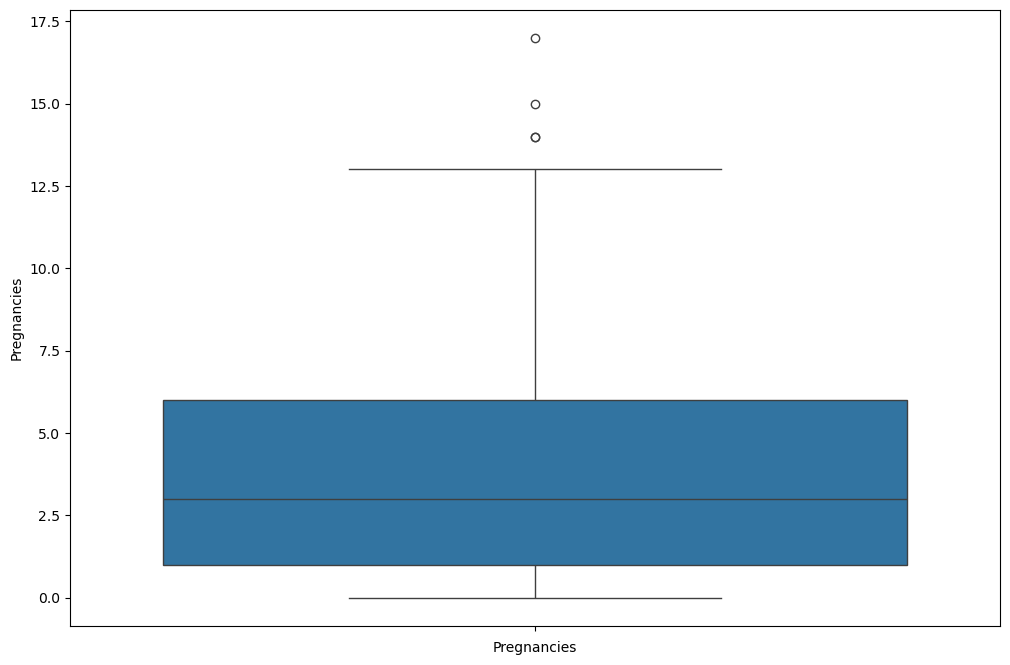

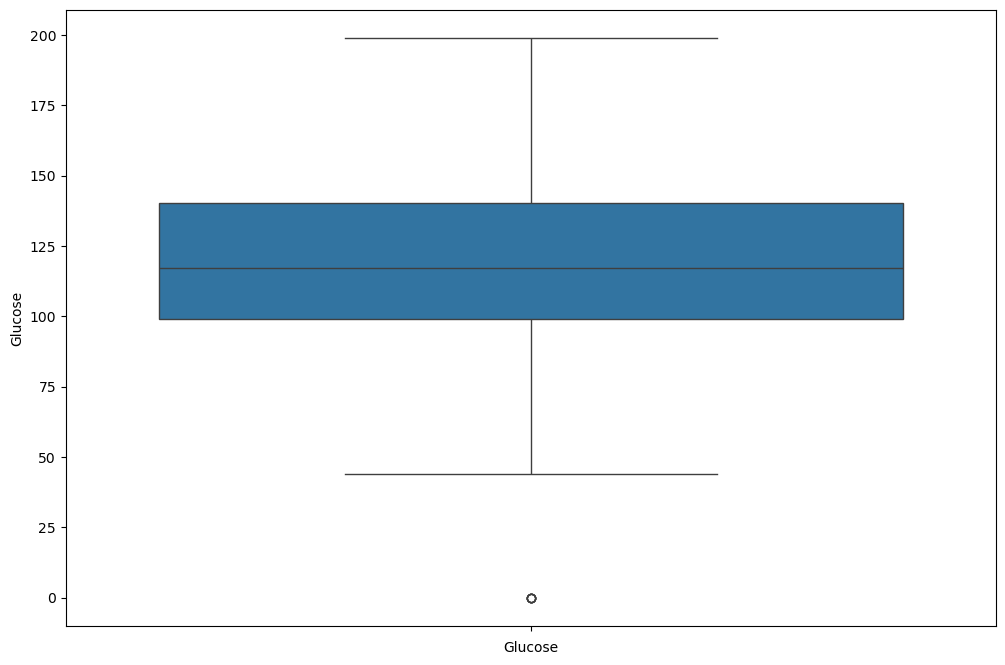

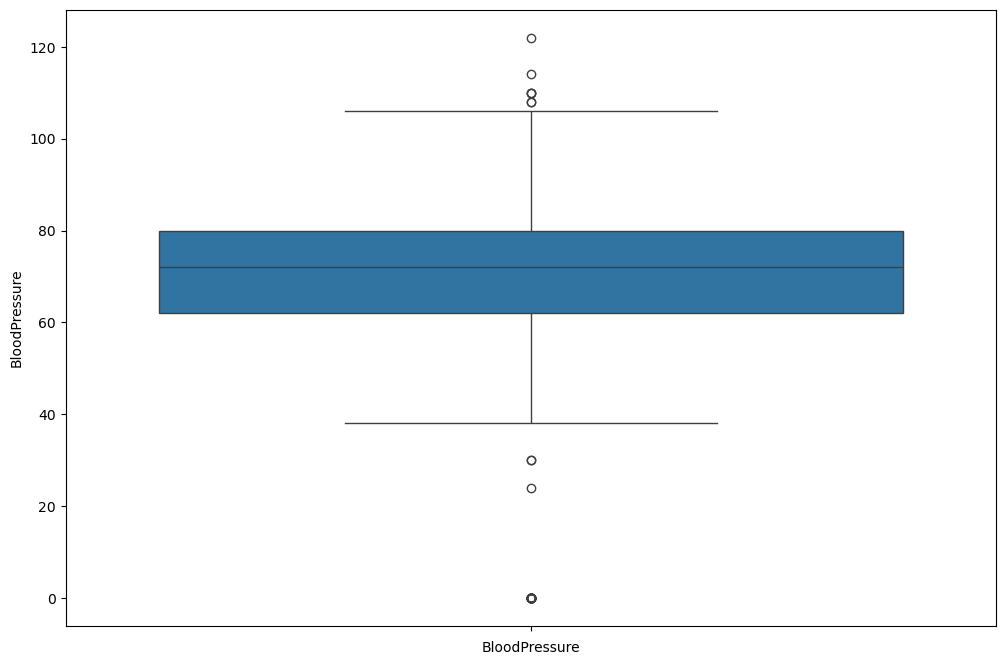

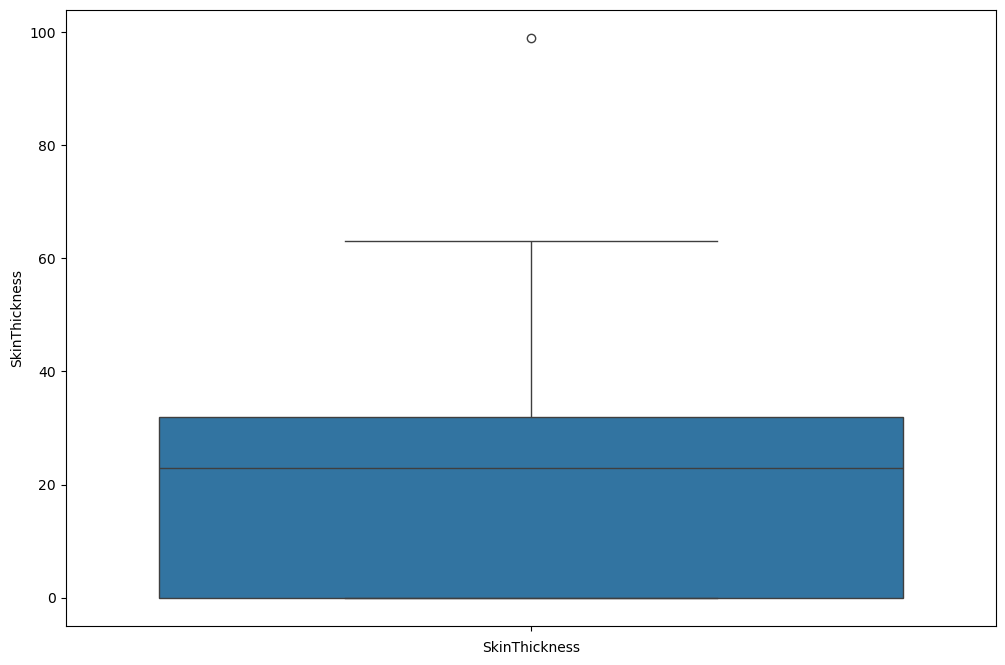

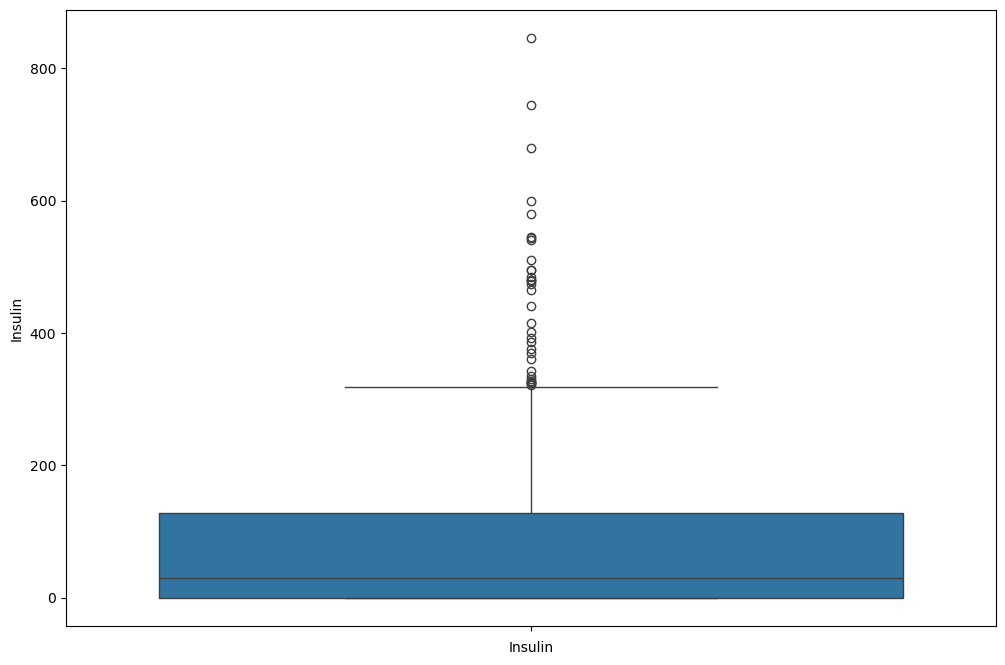

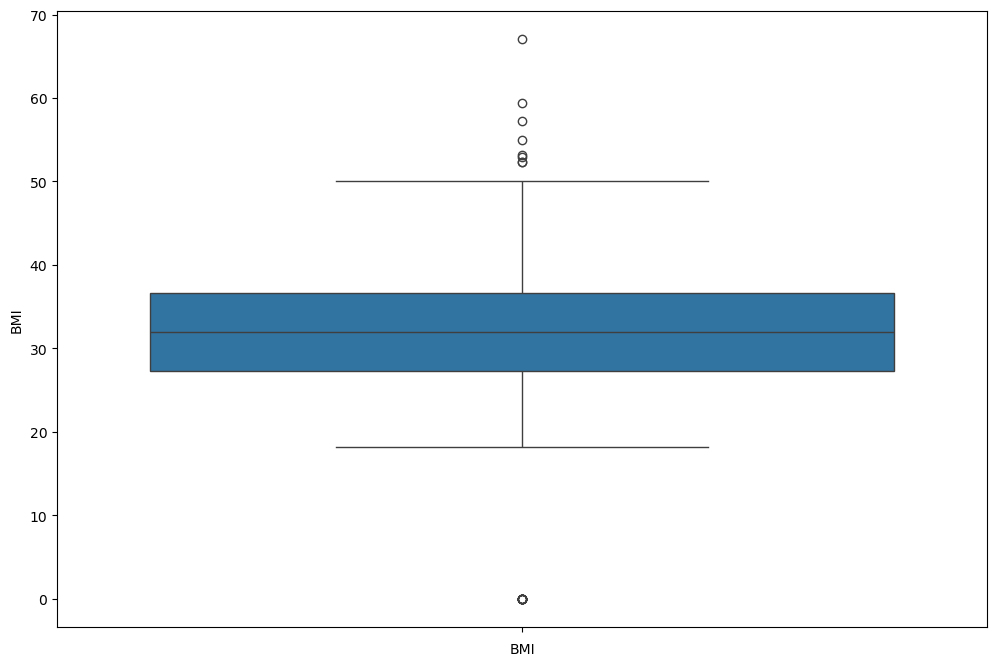

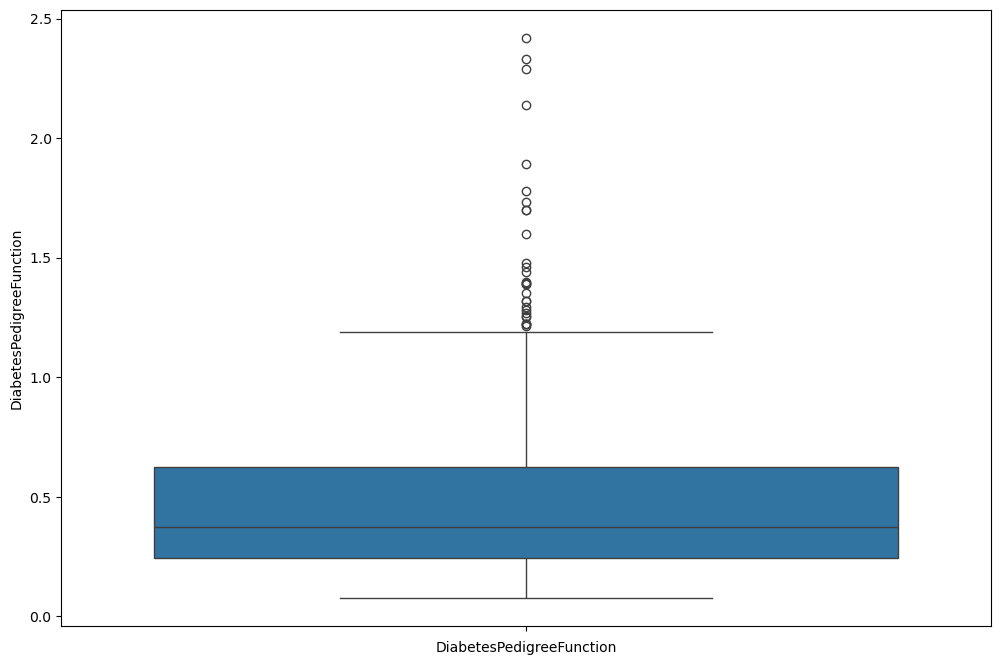

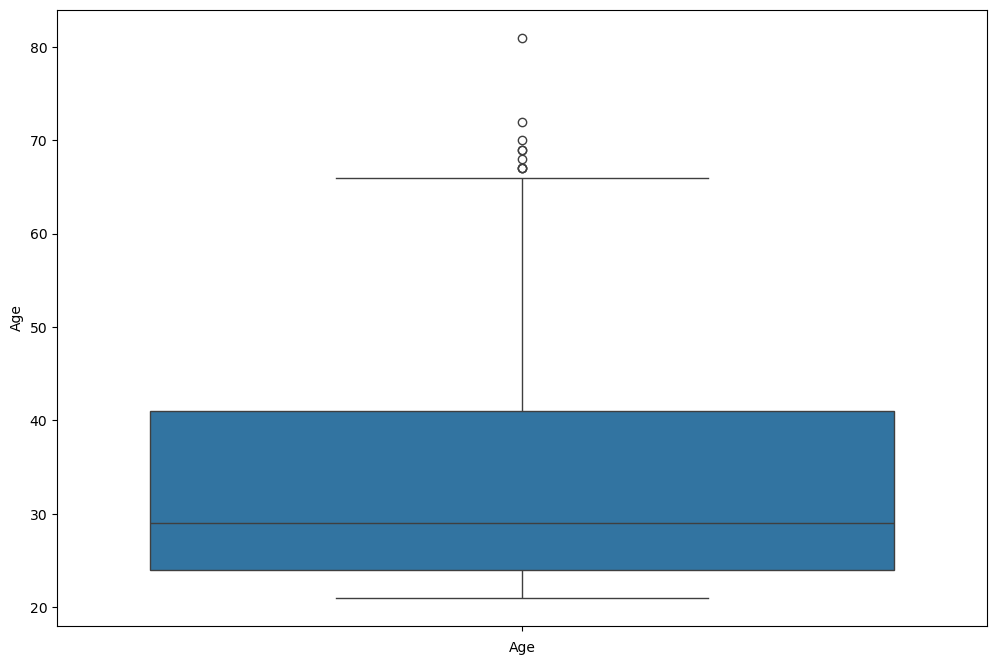

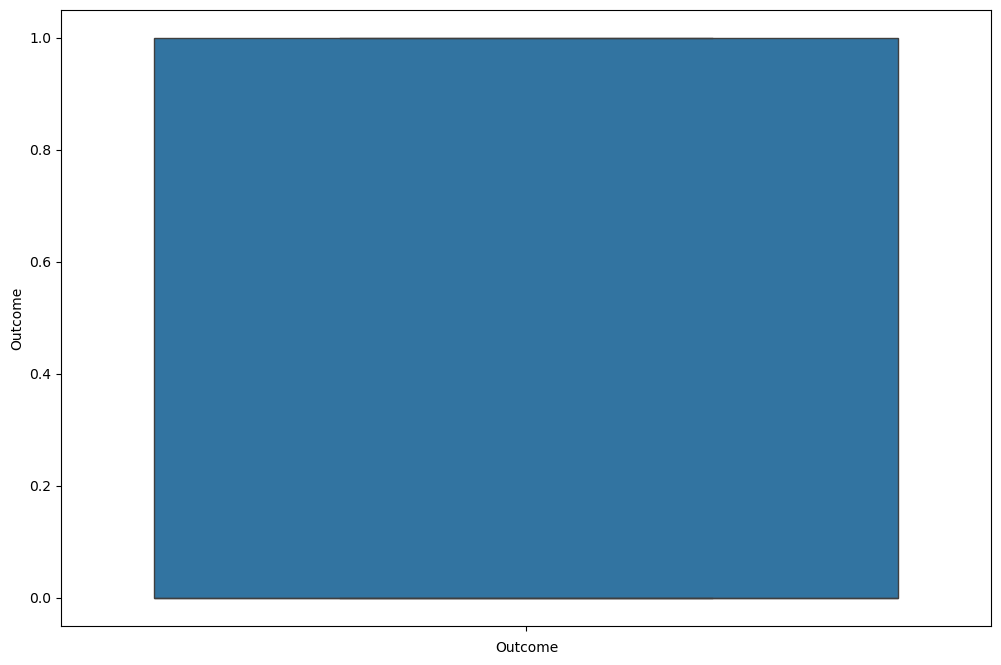

In [15]:
for i in df.columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(df[i])
    plt.xlabel(i)

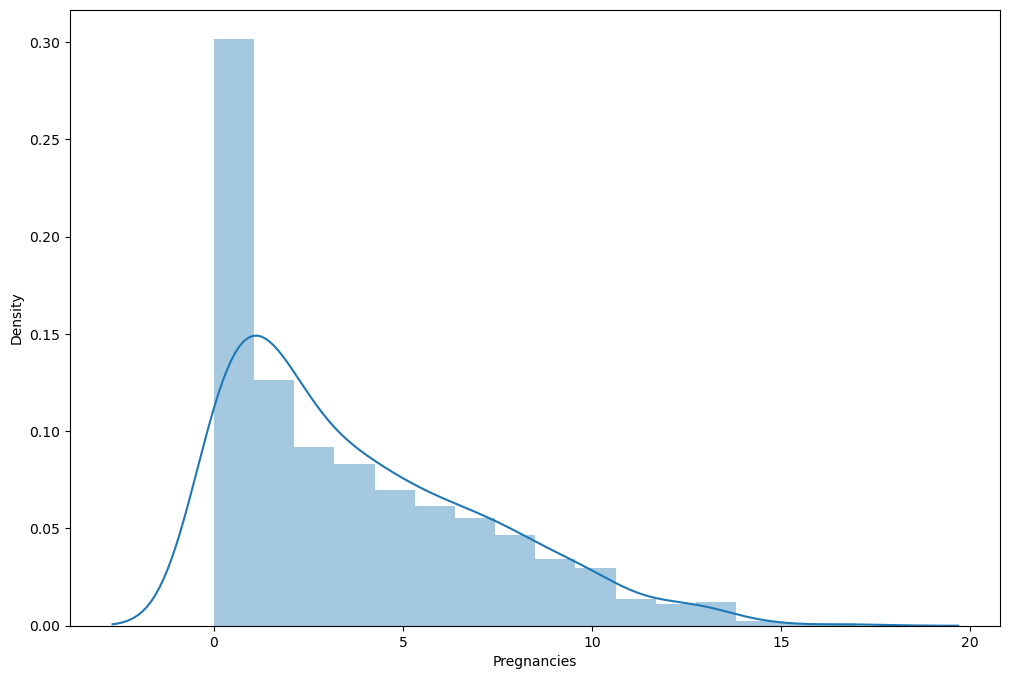

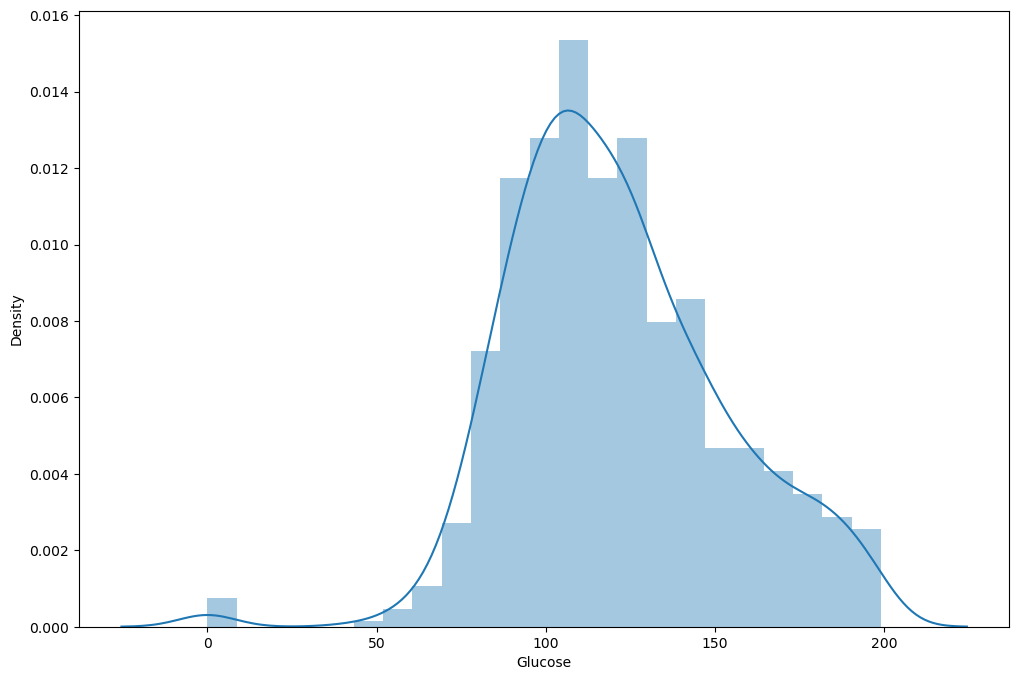

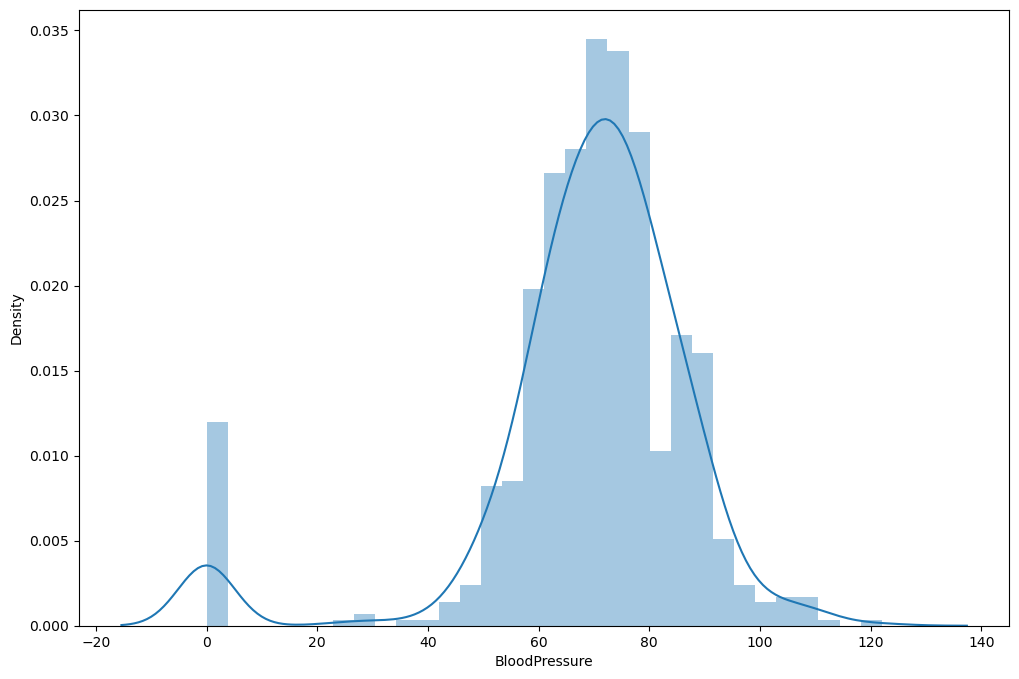

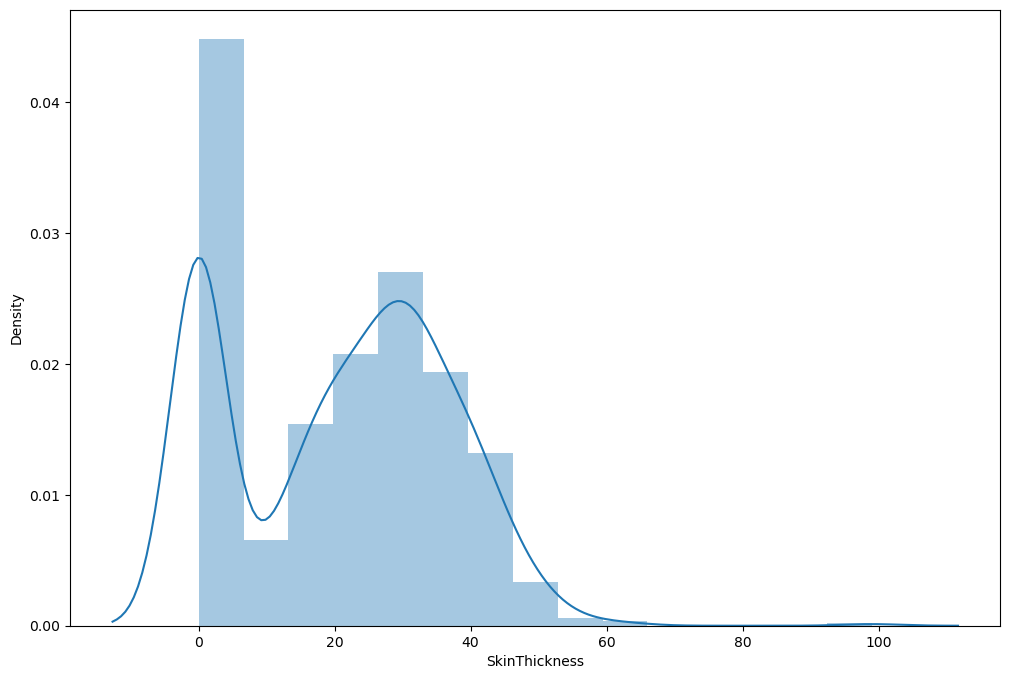

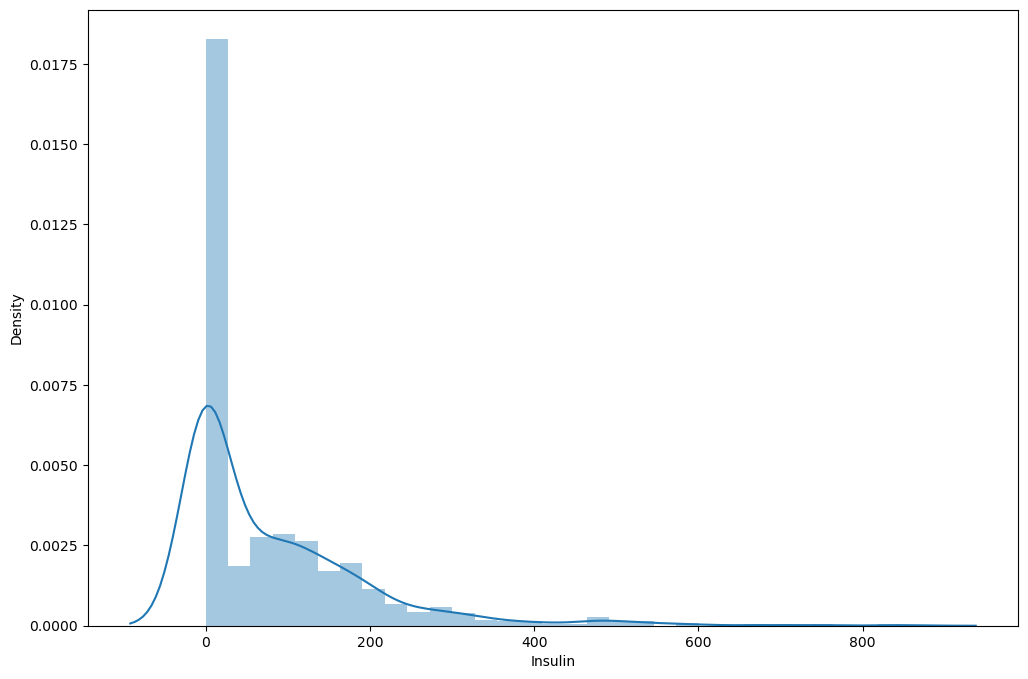

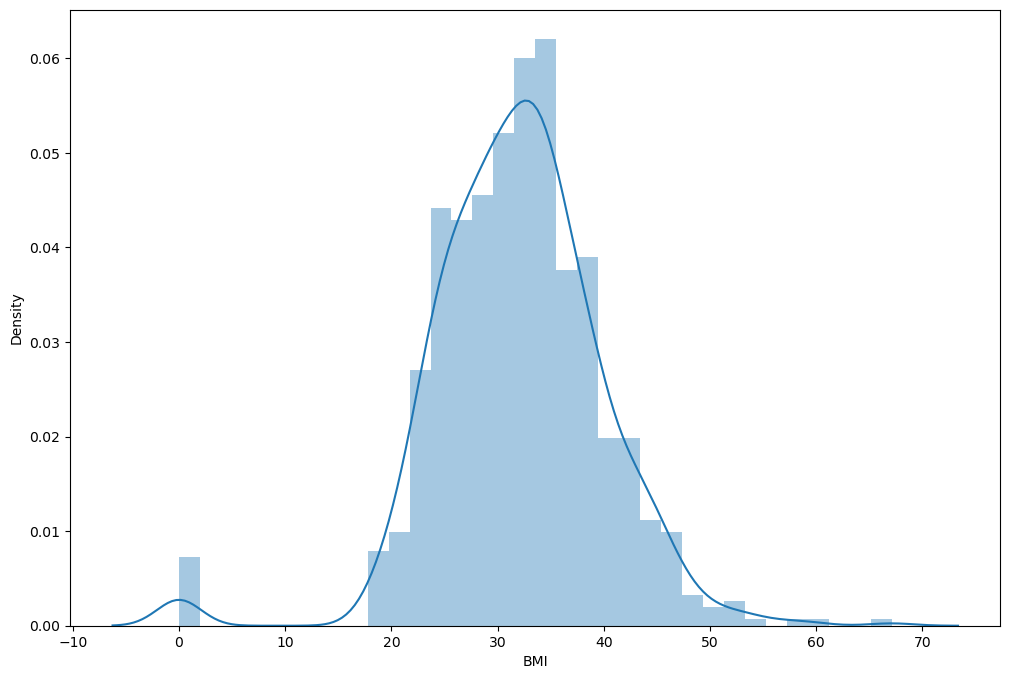

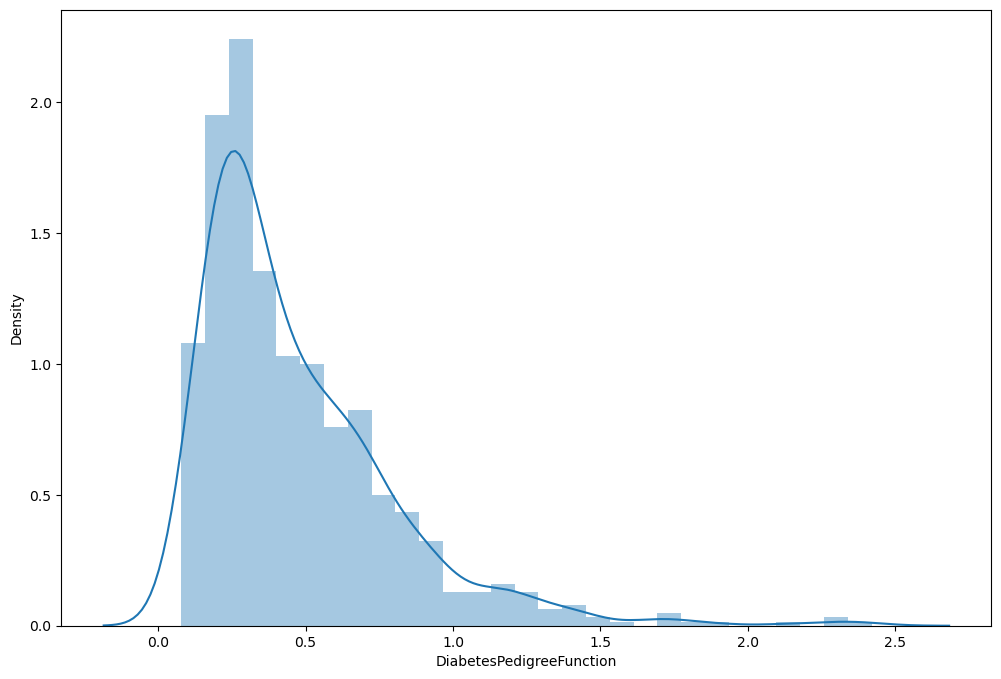

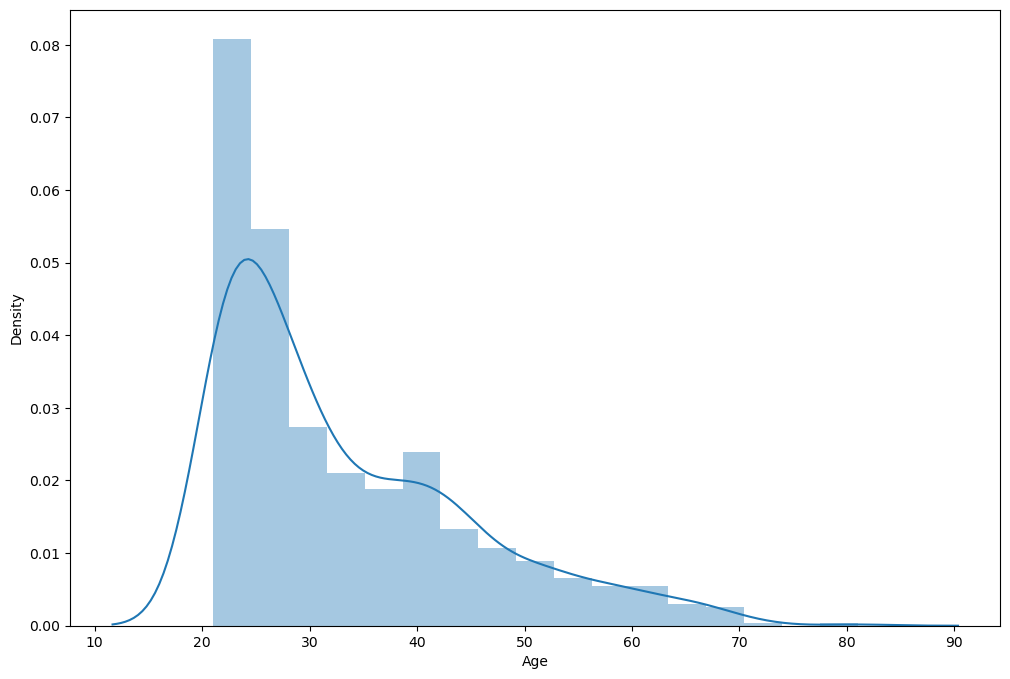

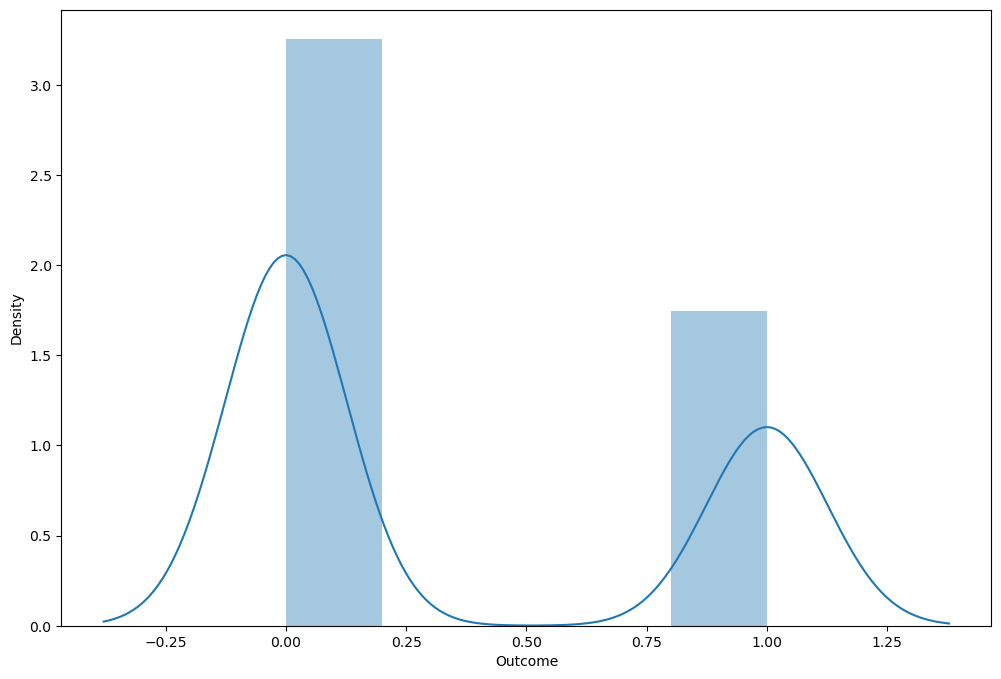

In [17]:
for i in df.columns:
    plt.figure(figsize=(12,8))
    sns.distplot(df[i])
    plt.xlabel(i)

In [19]:
from sklearn.preprocessing import RobustScaler

In [21]:
y = df['Outcome']

In [25]:
df = df.drop('Outcome' , axis = 1 )

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [29]:
rob = RobustScaler()

In [45]:
rob.fit_transform(df)

array([[ 0.6       ,  0.75151515,  0.        , ...,  0.17204301,
         0.66535948,  1.23529412],
       [-0.4       , -0.77575758, -0.33333333, ..., -0.58064516,
        -0.05620915,  0.11764706],
       [ 1.        ,  1.6       , -0.44444444, ..., -0.93548387,
         0.78300654,  0.17647059],
       ...,
       [ 0.4       ,  0.0969697 ,  0.        , ..., -0.62365591,
        -0.33333333,  0.05882353],
       [-0.4       ,  0.21818182, -0.66666667, ..., -0.20430108,
        -0.06143791,  1.05882353],
       [-0.4       , -0.58181818, -0.11111111, ..., -0.17204301,
        -0.1503268 , -0.35294118]])

In [47]:
df

array([[ 0.6       ,  0.75151515,  0.        , ...,  0.17204301,
         0.66535948,  1.23529412],
       [-0.4       , -0.77575758, -0.33333333, ..., -0.58064516,
        -0.05620915,  0.11764706],
       [ 1.        ,  1.6       , -0.44444444, ..., -0.93548387,
         0.78300654,  0.17647059],
       ...,
       [ 0.4       ,  0.0969697 ,  0.        , ..., -0.62365591,
        -0.33333333,  0.05882353],
       [-0.4       ,  0.21818182, -0.66666667, ..., -0.20430108,
        -0.06143791,  1.05882353],
       [-0.4       , -0.58181818, -0.11111111, ..., -0.17204301,
        -0.1503268 , -0.35294118]])

In [55]:
X= df

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=1)

In [63]:
X_train.shape

(614, 8)

In [65]:
X_test.shape

(154, 8)

In [67]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [69]:
from sklearn.linear_model import LogisticRegression

In [71]:
log = LogisticRegression()

In [73]:
log.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_Pred = log.predict(X_test)

In [77]:
y_Pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test , y_Pred)

0.7792207792207793

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model = RandomForestClassifier()

In [87]:
model.fit(X_train , y_train)

RandomForestClassifier()

In [89]:
yy = model.predict(X_test)

In [91]:
accuracy_score(y_test , yy)

0.7987012987012987